In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 8.1 MB/s eta 0:00:00:00:0100:01


In [3]:
import polars as pl

In [5]:
df = pl.DataFrame(
 {
 'Company': ['Ford','Toyota',
 'Toyota','Honda','Toyota',
 'Ford','Honda','Subaru',
 'Ford','Subaru'],
 'Model': ['F-Series','RAV4',
 'Camry','CR-V','Tacoma',
 'Explorer','Accord','CrossTrek',
            'Escape','Outback'],
 'Sales': [58283,32390,25500,18081,
 21837,19076,11619,15126,
 13272,10928]
 }
)
df

Company,Model,Sales
str,str,i64
"""Ford""","""F-Series""",58283
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Honda""","""CR-V""",18081
"""Toyota""","""Tacoma""",21837
"""Ford""","""Explorer""",19076
"""Honda""","""Accord""",11619
"""Subaru""","""CrossTrek""",15126
"""Ford""","""Escape""",13272


In [6]:
df.dtypes


[Utf8, Utf8, Int64]

In [7]:
df.columns 

['Company', 'Model', 'Sales']

In [8]:
df.rows 

<bound method DataFrame.rows of shape: (10, 3)
┌─────────┬───────────┬───────┐
│ Company ┆ Model     ┆ Sales │
│ ---     ┆ ---       ┆ ---   │
│ str     ┆ str       ┆ i64   │
╞═════════╪═══════════╪═══════╡
│ Ford    ┆ F-Series  ┆ 58283 │
│ Toyota  ┆ RAV4      ┆ 32390 │
│ Toyota  ┆ Camry     ┆ 25500 │
│ Honda   ┆ CR-V      ┆ 18081 │
│ …       ┆ …         ┆ …     │
│ Honda   ┆ Accord    ┆ 11619 │
│ Subaru  ┆ CrossTrek ┆ 15126 │
│ Ford    ┆ Escape    ┆ 13272 │
│ Subaru  ┆ Outback   ┆ 10928 │
└─────────┴───────────┴───────┘>

In [9]:
df.select(
 'Model'
)

Model
str
"""F-Series"""
"""RAV4"""
"""Camry"""
"""CR-V"""
"""Tacoma"""
"""Explorer"""
"""Accord"""
"""CrossTrek"""
"""Escape"""


In [11]:
df.select(
 pl.col(['Model','Sales'])
 .sort_by('Sales')
)

Model,Sales
str,i64
"""Outback""",10928
"""Accord""",11619
"""Escape""",13272
"""CrossTrek""",15126
"""CR-V""",18081
"""Explorer""",19076
"""Tacoma""",21837
"""Camry""",25500
"""RAV4""",32390


In [12]:
df.select(
 [pl.col(pl.Int64), 'Company']
)

Sales,Company
i64,str
58283,"""Ford"""
32390,"""Toyota"""
25500,"""Toyota"""
18081,"""Honda"""
21837,"""Toyota"""
19076,"""Ford"""
11619,"""Honda"""
15126,"""Subaru"""
13272,"""Ford"""


In [13]:
df.select(
 [pl.col(pl.Utf8)]
)

Company,Model
str,str
"""Ford""","""F-Series"""
"""Toyota""","""RAV4"""
"""Toyota""","""Camry"""
"""Honda""","""CR-V"""
"""Toyota""","""Tacoma"""
"""Ford""","""Explorer"""
"""Honda""","""Accord"""
"""Subaru""","""CrossTrek"""
"""Ford""","""Escape"""


In [14]:
df.row(0) # get the first row

('Ford', 'F-Series', 58283)

In [15]:
df[:2] # first 2 rows
df[[1,3]] # second and fourth row

Company,Model,Sales
str,str,i64
"""Toyota""","""RAV4""",32390
"""Honda""","""CR-V""",18081


In [14]:
df.filter(
 pl.col('Company') == 'Toyota'
)

Company,Model,Sales
str,str,i64
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Toyota""","""Tacoma""",21837


In [16]:
df.filter(
 (pl.col('Company') == 'Toyota') |
 (pl.col('Company') == 'Ford')
)

Company,Model,Sales
str,str,i64
"""Ford""","""F-Series""",58283
"""Toyota""","""RAV4""",32390
"""Toyota""","""Camry""",25500
"""Toyota""","""Tacoma""",21837
"""Ford""","""Explorer""",19076
"""Ford""","""Escape""",13272


In [17]:
df.filter(
 pl.col('Company') == 'Ford'
).select('Model')


Model
str
"""F-Series"""
"""Explorer"""
"""Escape"""


In [17]:
df.filter(
 pl.col('Company') == 'Toyota'
).select(['Model','Sales'])

Model,Sales
str,i64
"""RAV4""",32390
"""Camry""",25500
"""Tacoma""",21837


In [4]:
import pandas as pd
import time
start = time.time()
df = pd.read_csv('flights.csv')
df = df[(df['MONTH'] == 12) &
 (df['ORIGIN_AIRPORT'] == 'SEA') &
 (df['DESTINATION_AIRPORT'] == 'DFW')]
end = time.time()
print(end - start)
df

Traceback (most recent call last):
  Cell In[4], line 4
    df = pd.read_csv('flights.csv')
  File /opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:211 in wrapper
    return func(*args, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:331 in wrapper
    return func(*args, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/pandas/io/parsers/readers.py:950 in read_csv
    return _read(filepath_or_buffer, kwds)
  File /opt/conda/lib/python3.10/site-packages/pandas/io/parsers/readers.py:605 in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File /opt/conda/lib/python3.10/site-packages/pandas/io/parsers/readers.py:1442 in __init__
    self._engine = self._make_engine(f, self.engine)
  File /opt/conda/lib/python3.10/site-packages/pandas/io/parsers/readers.py:1735 in _make_engine
    self.handles = get_handle(
  File /opt/conda/lib/python3.10/site-packages/pandas/io/common.py:856 in get_handle
    handle = open(
FileNo

In [ ]:
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').filter(
 (pl.col('MONTH') == 12) &
 (pl.col('ORIGIN_AIRPORT') == 'SEA') &
 (pl.col('DESTINATION_AIRPORT') ==
 'DFW'))
end = time.time()

In [ ]:
print(end - start)
display(df)

In [ ]:
import polars as pl
import time
start = time.time()
df = pl.scan_csv('flights.csv').filter(
 (pl.col('MONTH') == 12) &
 (pl.col('ORIGIN_AIRPORT') == 'SEA') &
 (pl.col('DESTINATION_AIRPORT') ==
 'DFW')).collect()
end = time.time()
print(end - start)
display(df)

In [ ]:
import polars as pl
import time
start = time.time()
df = pl.read_csv('flights.csv').lazy().filter((pl.col('MONTH') == 12) & (pl.col('ORIGIN_AIRPORT') == 'SEA') & (pl.col('DESTINATION_AIRPORT') == 'DFW')).collect()
end = time.time()

print(end - start)
display(df)   

In [ ]:
pl.scan_csv('train.csv')

In [ ]:
!pip install pydot
!pip install graphviz

In [18]:
pl.scan_csv('stopped_workspaces1.csv').collect()

WorkspaceId,UserName,ComputerName,State
str,str,str,str
"""ws-44tfj2hd9""","""ajay3534""","""WSAMZN-F4GCF6J…","""STOPPED"""
"""ws-v2lgcn4yg""","""aqur6459""","""WSAMZN-5CFO6BV…","""STOPPED"""
"""ws-56qjgdnvc""","""echa7159""","""WSAMZN-4L3NJVV…","""STOPPED"""
"""ws-89yrb3156""","""asri2881""","""WSAMZN-LD9F70B…","""STOPPED"""
"""ws-1fp9xj1kq""","""epla0628""","""WSAMZN-OSTJA82…","""STOPPED"""
"""ws-1qzwnswr3""","""ypar5200""","""WSAMZN-3ULFUTL…","""STOPPED"""
"""ws-kglsmhr79""","""krat1077""","""WSAMZN-1KUGBA4…","""STOPPED"""
"""ws-w5l0nkn8t""","""tseb0821""","""WSAMZN-9KTKLV2…","""STOPPED"""
"""ws-3zrs19dz1""","""hluu1836""","""WSAMZN-QVKOUGO…","""STOPPED"""


In [70]:
q = (
 pl.scan_csv('stopped_workspaces1.csv').(pl.Utf8)
)
q.collect()

Traceback (most recent call last):
  File /opt/conda/lib/python3.10/site-packages/IPython/core/compilerop.py:86 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Cell In[70], line 2
    pl.scan_csv('stopped_workspaces1.csv').(pl.Utf8)
                                           ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.


In [66]:
q.fetch(5)

Traceback (most recent call last):
  Cell In[66], line 1
    q.fetch(5)
  File /opt/conda/lib/python3.10/site-packages/polars/lazyframe/frame.py:1864 in fetch
    return wrap_df(lf.fetch(n_rows))
ComputeError: cannot compare utf-8 with numeric data

Use %tb to get the full traceback.


In [60]:
q = (
 pl.scan_csv('stopped_workspaces1.csv')
 .select(['WorkspaceId','ComputerName'])
 .with_columns([
  pl.col('ComputerName')
 ])
 .filter(pl.col('ComputerName') > 18)
)

q


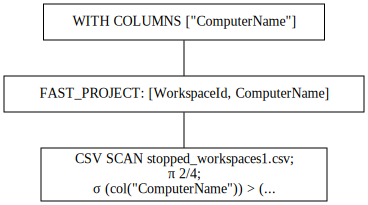

In [61]:
q.show_graph(optimized=True)

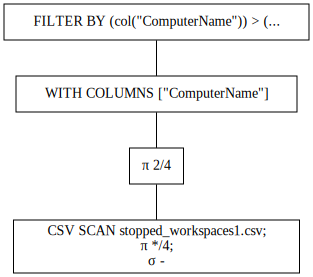

In [62]:
q.show_graph(optimized=False)

In [63]:
q.collect()


Traceback (most recent call last):
  Cell In[63], line 1
    q.collect()
  File /opt/conda/lib/python3.10/site-packages/polars/lazyframe/frame.py:1606 in collect
    return wrap_df(ldf.collect())
ComputeError: cannot compare utf-8 with numeric data

Use %tb to get the full traceback.


In [59]:
q.fetch(5)

Traceback (most recent call last):
  Cell In[59], line 1
    q.fetch(5)
  File /opt/conda/lib/python3.10/site-packages/polars/lazyframe/frame.py:1864 in fetch
    return wrap_df(lf.fetch(n_rows))
ComputeError: strict conversion from `str` to `f64` failed for value(s) ["WSAMZN-F4GCF6JK", "WSAMZN-5CFO6BVD", … "WSAMZN-LD9F70BV"]; if you were trying to cast Utf8 to temporal dtypes, consider using `strptime`

Use %tb to get the full traceback.


In [42]:
import polars as pl
q = (
 pl.scan_csv('stopped_workspaces1.csv')
)
df = q.collect()
df

WorkspaceId,UserName,ComputerName,State
str,str,str,str
"""ws-44tfj2hd9""","""ajay3534""","""WSAMZN-F4GCF6J…","""STOPPED"""
"""ws-v2lgcn4yg""","""aqur6459""","""WSAMZN-5CFO6BV…","""STOPPED"""
"""ws-56qjgdnvc""","""echa7159""","""WSAMZN-4L3NJVV…","""STOPPED"""
"""ws-89yrb3156""","""asri2881""","""WSAMZN-LD9F70B…","""STOPPED"""
"""ws-1fp9xj1kq""","""epla0628""","""WSAMZN-OSTJA82…","""STOPPED"""
"""ws-1qzwnswr3""","""ypar5200""","""WSAMZN-3ULFUTL…","""STOPPED"""
"""ws-kglsmhr79""","""krat1077""","""WSAMZN-1KUGBA4…","""STOPPED"""
"""ws-w5l0nkn8t""","""tseb0821""","""WSAMZN-9KTKLV2…","""STOPPED"""
"""ws-3zrs19dz1""","""hluu1836""","""WSAMZN-QVKOUGO…","""STOPPED"""


In [ ]:
import polars as pl
q = (pl.scan_csv('train.csv')
     .select(
         pl.col('Cabin').is_null()
     )
    )
df = q.collect()
df

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.col('Cabin').is_null().sum()
 )
)


In [ ]:
q = (
 pl.scan_csv('train.csv')
)

for col in q.collect():
 print(
 f'{col.name} - {col.is_null().sum()}') 

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(strategy='backward')
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(strategy='forward')
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .fill_null(1)
)
q.collect()
q.fetch(5)

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.col('Cabin').fill_null(
 strategy='backward')
 )
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Cabin'),
 # select all columns except Cabin
 pl.col('Cabin').fill_null(
      strategy='backward')
 ]
 )
)

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Age'),
 pl.col('Age').fill_null(
 value = 0)
 ]
 )
)

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 [
 pl.exclude('Age'),
 pl.col('Age').fill_null(
 value = pl.col('Age').mean())
 ]
     )
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .drop_nulls()
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .select(
 pl.exclude('Cabin')
 )
)
q.collect()

In [ ]:
# drop the Cabin column
q = (
 pl.scan_csv('train.csv')
 .drop(['Cabin'])
)
q.collect()

In [ ]:
# drop the Ticket & Fare & Cabin columns 
q = (
 pl.scan_csv('train.csv')
 .drop(['Ticket','Fare','Cabin'])
 
)
q.collect()

In [ ]:
q = (
 pl.scan_csv('train.csv')
 .drop_nulls()
 .drop(['Ticket','Fare','Cabin'])
)
q.collect()

In [ ]:
df = pl.read_csv('train.csv')
df.drop_in_place('Cabin')
q.collect()

In [4]:
import string
import re
import pandas as pd
import itertools

def preprocess_text(text_file):
  # Read the text file and encode it as UTF-8
  with open(text_file, encoding='utf-8-sig') as f:
    text = f.read()

  # Delete all the URLs and Emails in the file
  text = re.sub(r'www\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'\S*@\S*\s?', '', text)

  # Delete all the numbers in the file
  text = ''.join([i for i in text if not i.isdigit()])

  # Delete all the punctuation marks
  text = text.translate(str.maketrans('','',string.punctuation))

  # Convert text to LOWERCASE
  text = text.lower()

  # Seperate each works with a space and save the words to a list named "data"
  data = text.split()

  return data

# Preprocess the text file
data = preprocess_text('kin.txt')

# Print out the preprocessed data
#print(data)


In [6]:
!pip install textblob
from textblob import TextBlob

# Create a TextBlob object from the data list
blob = TextBlob(' '.join(data))

# Get the sentiment of the text
sentiment = blob.sentiment

print(f'The sentiment of the text is {sentiment.polarity:.3f} (positive or negative) and {sentiment.subjectivity:.3f} (objective or subjective).')


     |████████████████████████████████| 636 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 13.9 MB/s eta 0:00:01


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


The sentiment of the text is 0.127 (positive or negative) and 0.497 (objective or subjective).


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Create a SentimentIntensityAnalyzer object
vader = SentimentIntensityAnalyzer()

# Get the sentiment scores for each sentence in the data list
sentiments = [vader.polarity_scores(sentence) for sentence in data]

# Print the sentiments
print(sentiments)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

